This tutorial was created by Bruno Abreu. It is intellectual property of the University of Illinois. The content is entirely based on Qiskit's documentation and training materials (see references in each section).

The topic of this notebook is **Simulating Quantum Circuits**. Some of the sections contain exercises.

### Environment setup

`qiskit` is straightforward to install using `pip`. For more information, please visit their documentation: https://qiskit.org/documentation/getting_started.html

In [3]:
!pip install qiskit[visualization]

In [4]:
import qiskit.tools.jupyter

%qiskit_version_table

### Imports

In [78]:
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.fake_provider import FakeLimaV2
from qiskit import transpile

# Simulating quantum circuits

## Simulation engine

After a circuit is built, the programmer wants to measure the outcome several times to understand the probability distribution associated to the overall quantum state. `qiskit` implements a simulator in the `Aer` module: https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html

`Aer` allows the programmer to choose between several simulation methods, such as density matrix, matrix product states, and others.

After the method is selected, we use the `get_backend()` method to start an instance of the simulation engine.

In [8]:
simulator = Aer.get_backend('aer_simulator')  # set up the backend as the Aer simulator 

## Noise-free simulation

In this situation, quantum gates have 100% fidelity, meaning the intended quantum state transformation expressed by the unitary evolution is always achieved. Consider the following quantum circuit:

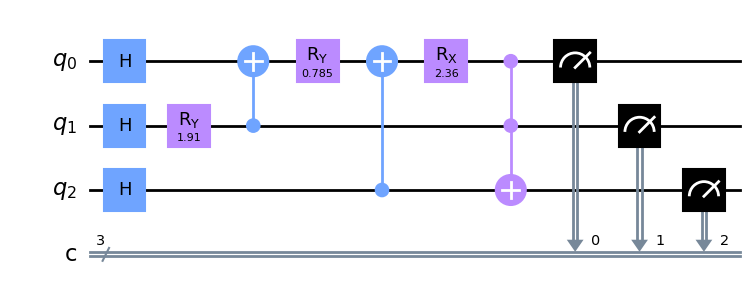

In [16]:
qc = QuantumCircuit(3, 3)  # 3 qubits with 3 classical bits
qc.h([0,1,2])
qc.ry(1.911, 1)
qc.cx(1, 0)
qc.ry(0.785, 0)
qc.cx(2, 0)
qc.rx(2.356, 0)
qc.ccx(0, 1, 2)
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')

We can dispatch the circuit to the simulator using its `run()` method, which will start a job in the simulation engine:

In [17]:
job = simulator.run(qc) # dispatch the circuit to the quantum simulator

Metadata about the simulation results can be accessed through the `result()` method of the returned job object:

In [18]:
print(job.result()) #  visualize metadata

Result(backend_name='aer_simulator', backend_version='0.12.0', qobj_id='', job_id='04703a56-6f2a-4c42-82b0-aff7074d82e1', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x5': 9, '0x3': 379, '0x7': 130, '0x2': 372, '0x0': 9, '0x4': 3, '0x1': 1, '0x6': 121}), header=QobjExperimentHeader(creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata=None, n_qubits=3, name='circuit-122', qreg_sizes=[['q', 3]]), status=DONE, seed_simulator=1623257411, metadata={'parallel_state_update': 10, 'parallel_shots': 1, 'sample_measure_time': 0.000933375, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'device': 'CPU', 'active_input_qubits': [0, 1, 2], 'measure_sampling': True, 'num_clbits': 3, 'input_qubit_map': [[0, 0], [1, 1], [2, 2]], 'num_qubits': 3, 'method': 'statevector', 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.00475525)], date=20

## Visualizing simulation results

After running the simulations, we can get the exact counts, plot them in a histogram, or do more complex operations by plugging the results into workflows. The `result()` method returns an object that offers several of features: https://qiskit.org/documentation/stubs/qiskit.result.Result.html

In [19]:
result = job.result()
counts = result.get_counts()
print(counts)

{'101': 9, '011': 379, '111': 130, '010': 372, '000': 9, '100': 3, '001': 1, '110': 121}


In particular, we can use the `plot_histogram()` function of the `qiskit.visualization` library to quickly visualize the data in this dictionary:

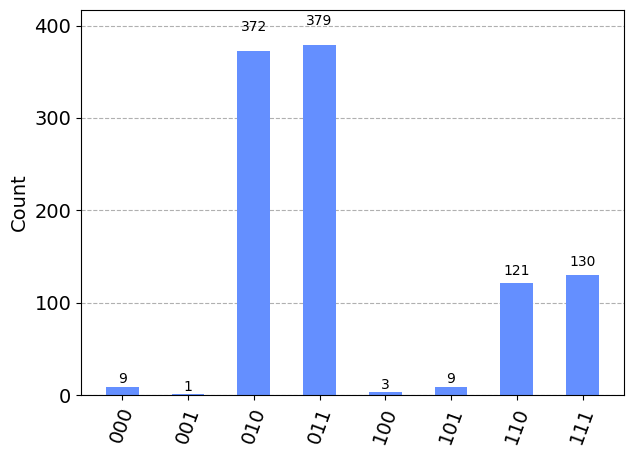

In [20]:
plot_histogram(counts)

### Exercise

- a) Build a quantum circuit with $N > 3$ qubits and with depth $d > 3$ and multi-qubit gates
- b) Choose a simulation engine and run a simulation of the circuit
- c) Print and plot the simulation results

In [ ]:
# a) build a circuit

In [28]:
# b) choose the simulation engine and run the simulation

In [29]:
# c) print and plot results

## Controling number of simulation shots

To obtain reliable estimates of the probability distribution of states associated to more complex circuits, it is often necessary to increase the number of shots in the simulation, or how many times the circuit is prepared and measured. By default, `Aer` runs 1024 shots. Adjusting this feature is possible by providing a value for the `shots` argument of the `run()` method:

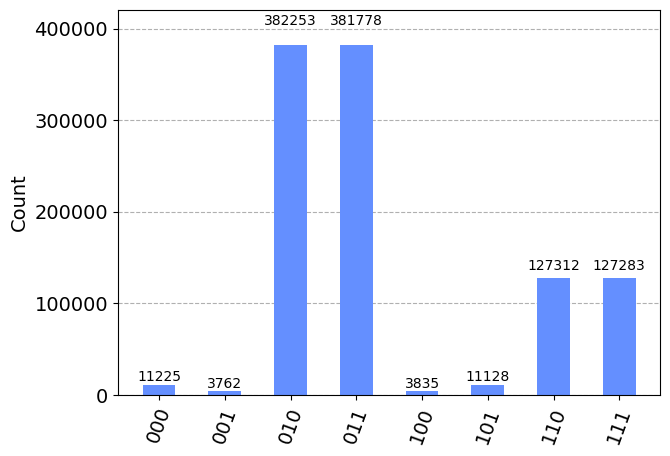

In [22]:
job_big = simulator.run(qc, shots=1024*1024)
result_big = job_big.result()
plot_histogram(result_big.get_counts())

Sometimes, for debugging and testing purposes, it is useful to run the simulation with a reduced number of shots and, instead of collecting the sum of measurements for each each state, collect the measured outcome of each individual shot. This can be done by setting the `memory` attribute of the `run()` method to `True`, and then using the `get_memory()` method of the `Result` object:

In [27]:
job_mem = simulator.run(qc, shots=16, memory=True)
result_mem = job_mem.result()
mem = result_mem.get_memory()
print(mem)

['011', '101', '011', '011', '011', '011', '011', '010', '010', '010', '111', '011', '010', '011', '010', '010']


### Exercise

Using the circuit you built in the previous exercise, gradually increase the number of simulation shots until the resulting probability distribution reaches the desired level of precision.

In [30]:
# simulate circuit with different number of shots

## Comparing engines

As mentioned above, the `AerSimulator` has different engines that can be specified through the `method` argument when preparing the backend object to run the simulations. A list of available methods and their short descriptions can be found in the `AerSimulator` class documentation: https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.AerSimulator.html

Another way to check on the available engines is by using the `backends()` method of the `Aer` provider. The default method is `automatic`, which will try to find the appropriate backend based on the circuit that is being provided when `run()` is called.

Some of these methods are GPU-accelerated, while some others are CPU-only. Additionaly, some of them support noisy simulations. In the cells below, we create a quantum circuit and simulate it using three different simulation engines, and then plot the results in the same graph to compare.

In [8]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

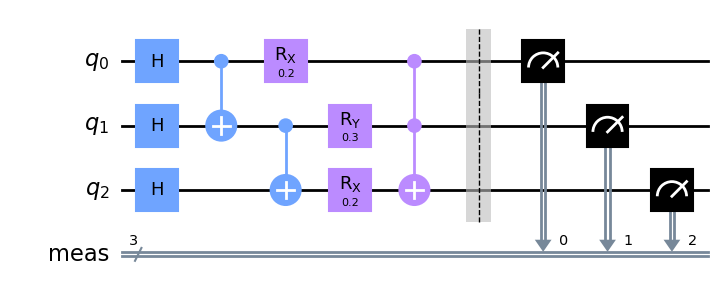

In [65]:
# create a quantum circuit

qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.cx([0,1], [1,2])
qc.rx(0.2,[0,2])
qc.ry(0.3,1)
qc.ccx(0,1,2)
qc.measure_all()
qc.draw('mpl')

In [66]:
# create different simulator engines

simulator_auto = Aer.get_backend('aer_simulator')
simulator_stab = Aer.get_backend('aer_simulator_stabilizer')
simulator_unit = Aer.get_backend('aer_simulator_unitary')

In [67]:
# run the jobs in each simulator

n_shots = 1024*16

job_auto = simulator_0.run(qc, shots=n_shots)
job_stab = simulator_0.run(qc, shots=n_shots)
job_unit = simulator_0.run(qc, shots=n_shots)

counts_auto = job_auto.result().get_counts()
counts_stab = job_stab.result().get_counts()
counts_unit = job_unit.result().get_counts()

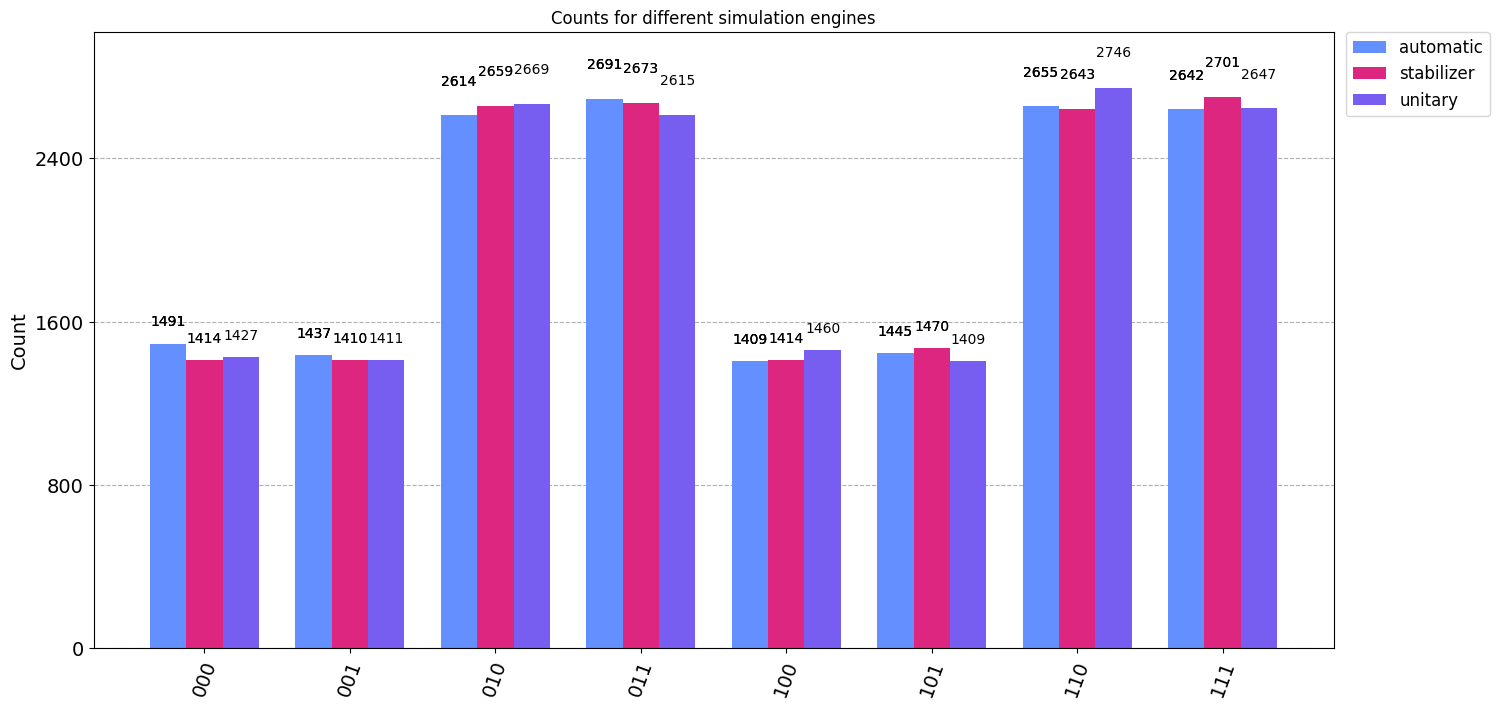

In [70]:
# plot results

plot_histogram(
    [counts_auto, counts_stab, counts_unit],
    title='Counts for different simulation engines',
    legend=["automatic", "stabilizer", "unitary"],
    figsize=(16,8)
)

Notice that, so far, we are simulating *ideal* quantum circuits, in which gates and measurements are fault-tolerant (not noisy). For that reason, the simulation engines should give us results that are statistically equivalent. You can verify that by increasing the number of shots in the simulation. 

## Noisy simulation

Real quantum computers are **not** fault-tolerant. This means that operations performed when an algorithm or a random set of instructions are executed have some intrinsic, sometimes systematic error associated to them. There are many ways to model errors when performing these operations, and building models that accurately represent real quantum devices is an active area of research. 

Typically, errors arise when performing single and multi-qubit gate operations (gate errors) and when measuring qubits (readout errors). In general, the programmer is interested in modeling the error of a certain quantum device, which is characterized by a series of parameters that enclose the average noise inherent to that device. 

It is possible to build noise models and even create noise for custom quantum gates, but these are beyond the scope of this tutorial. You can find examples in the two links below:

- https://qiskit.org/ecosystem/aer/tutorials/3_building_noise_models.html
- https://qiskit.org/ecosystem/aer/tutorials/4_custom_gate_noise.html


Here, we will get the noise model directly from the `qiskit.IMBQ` library, which contains pre-built models that are in alignment with the noise observed in IBM's quantum hardware. A different example can be found on `qiskit`'s tutorials webpage: https://qiskit.org/ecosystem/aer/tutorials/2_device_noise_simulation.html

We will use the quantum circuit from the last section.

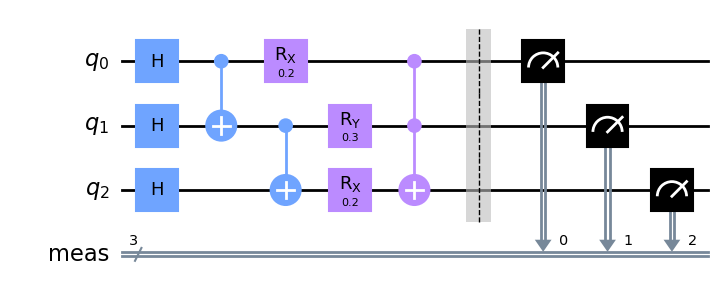

In [71]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.cx([0,1], [1,2])
qc.rx(0.2,[0,2])
qc.ry(0.3,1)
qc.ccx(0,1,2)
qc.measure_all()
qc.draw('mpl')

### Choosing the noisy engine

A list of several noisy simulation engines can be found in `qiskit.providers.fake_provider`'s documentation:
https://qiskit.org/documentation/apidoc/providers_fake_provider.html

Here, we will use the `FakeLimaV2` provider, which is a simulation engine that mimics the behavior of IBMQ's Lima computer: 
- https://qiskit.org/documentation/stubs/qiskit.providers.fake_provider.FakeLimaV2.html#qiskit.providers.fake_provider.FakeLimaV2
- https://quantum-computing.ibm.com/services/resources?services=systems&system=ibmq_lima


### Transpilation

Until now, we have been dealing with ideal simulations, which are not necessarily connected to a real quantum machine model. Different quantum machines will have different protocols to execute the gates we want to execute in the circuit. For example, a Hadamard $H$ is a series of operations enclosing more fundamental gates implemented in the actual quantum device. These "more fundamental" gates are different for different machines and are connected to the physics of the device.

The process of transforming a quantum circuit into one that contains operations implemented in a real device is called *transpilation*. `qiskit` provides a `Transpiler` class to perform this transformation, which takes as arguments a `QuantumCircuit` object and the target backend, or simulation engine: https://qiskit.org/documentation/apidoc/transpiler.html

To simulate the noisy device, we need to first transpile our quantum circuit.

In [76]:
# specify the device or simulation engine

noisy_simulator = FakeLimaV2()

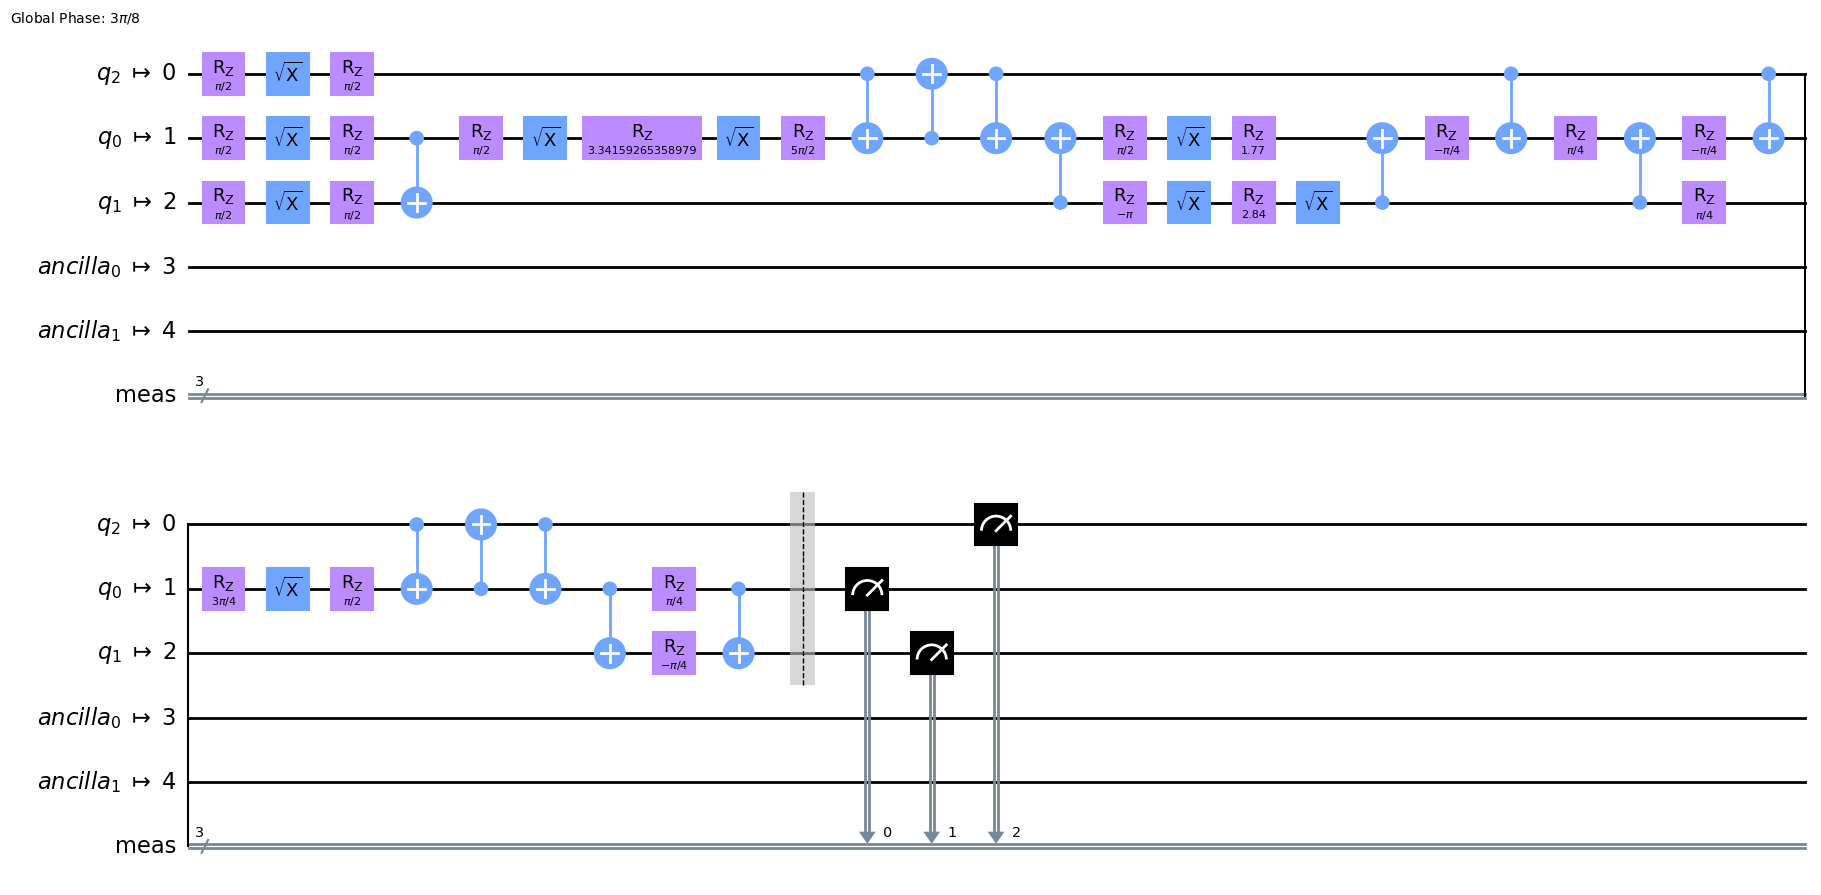

In [77]:
# transpile the quantum circuit

transpiled_qc = transpile(qc, noisy_simulator)
transpiled_qc.draw('mpl')

As you can see, the actual circuit that would be executed by the hardware is quite different.

### Simulation

With the noisy simulation engine and the transpiled circuit in hands, we proceed with the simulation just like we did in the previous section.

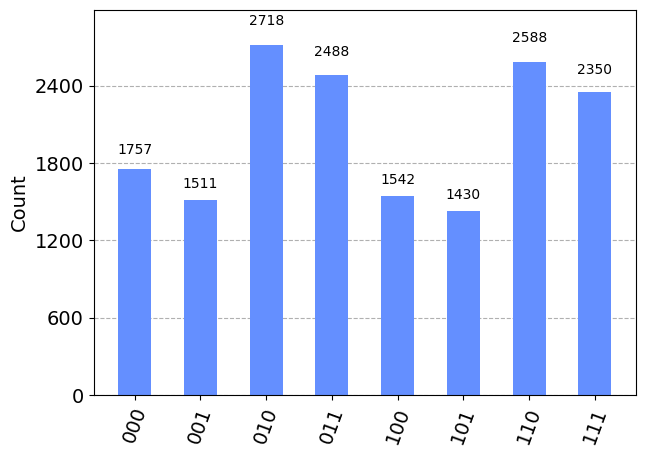

In [82]:
n_shots = 1024*16
job_noisy = noisy_simulator.run(transpiled_qc, shots=n_shots)
plot_histogram(job_noisy.result().get_counts())

### Exercise

- Create a quantum circuit with a few qubits and measure the state of each qubit
- Simulate the results for an ideal, fault-tolerant device
- Choose a real device from the list in the `qiskit.providers.fake_provider` documentation
- Transpile the quantum circuit and compare the differences
- Simulate the circuit in the noisy engine and compare

In [84]:
# create quantum circuit


In [85]:
# simulate ideal device


In [86]:
# create noisy simulation engine


In [87]:
# transpile circuit


In [88]:
# perform noisy simulation
